## 通过柱状统计进行字符分割-1Z实验室

## 概述
很多时候，我们要识别的字符，并不是完全独立的，它们之间可能有连笔，可能有接触点。 所以在数字识别或者整个字符识别领域，最难的难点就在于字符分割。阿凯会带大家了解字符分隔常用的几个经典算法， 包括直方图分割,CFS与传统滴水算法。
会分三节课依次讲解。本节，我们来了解一下最简单的直方图分割。

![hist_seg_result.png](hist_seg_result.png)

## 导入图片素材

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

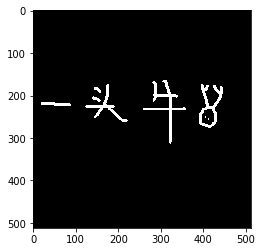

In [3]:
img = cv2.imread('demo.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray")
plt.show()

## 垂直方向投影

我们需要在垂直方向上统计白色像素点的个数（非0区域的个数）。 
你可以使用for循环依次遍历， 但是这样比较低效， 你可以借助`numpy`的库函数，更加高效地实现。

为了实现这个目的，我们需要借助 `np.nonzero` 函数。

In [4]:
np.nonzero(img != 0)

(array([164, 164, 164, ..., 312, 312, 313]),
 array([307, 308, 309, ..., 323, 324, 322]))

`np.nonzero` 返回的是非0点地坐标， x轴坐标跟y坐标分别用两个`ndarray`存储。
因为opencv中图片ndrray的格式设定， 第一维度是y轴坐标， 第二维度是x坐标。
所以如果我们想获取图片中所有非零元素的x坐标， 需要这样
```python
np.nonzero(img != 0)[1]
```

接下来我们获取了所有非零元素的x坐标的集合，当然x坐标有重复，所以需要统计个数，每个x坐标出现了多少次。
为了滤波，我们可能需要把x坐标划分为若干个窗口(bins)，进行统计. numpy中的`np.histogram`可以实现这个功能。
np.histogram 返回元素， 第一个为**直方图 hist**， 第二个元素为**binEdge**

```python
len(binEdge) = len(hist) + 1
```

详细使用说明见文档： [numpy.histogram](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html)

In [5]:
xhist = np.nonzero(img != 0)[1]

# 获取图片高度与宽度
height, width = img.shape
# 定义统计窗口宽度
bin_width = 2
# 获取窗口数
bins= int(width / bin_width)

# 获取统计数组
np.histogram(np.int64(xhist), bins=bins)

(array([  6,  12,  14,   7,  14,  14,   7,  14,  14,   7,  14,  14,   7,
         14,  14,   7,  14,  15,   7,  15,  14,   7,  14,  15,   7,  14,
         14,   7,  14,  14,   7,  14,  14,   7,  14,  14,   7,  14,  14,
          7,  14,  10,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   5,  12,
         14,   7,  14,  14,   7,  14,  15,  12,  27,  36,  25,  56,  60,
         32,  64,  72,  36,  70,  53,  17,  27,  24,  14,  31,  42,  25,
         68, 101,  48,  88,  70,  14,  29,  30,  15,  32,  32,  14,  24,
         18,   9,  18,  18,   9,  17,  16,   8,  16,  14,   7,  14,  15,
          7,  14,  14,   5,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          6,   5,  14,  14,   7,  14,  14,   7,  14,  14,   7,  14,  14,
          7,  27,  53,  34, 107,  98,  46,  79,  28,  14,  28,  28,  14,
         28,  28,  15,  38,  42,  21,  57,  66,  39

第一个元素是我们需要的垂直方向的投影


In [6]:
np.histogram(np.int64(xhist), bins=bins)[0]

array([  6,  12,  14,   7,  14,  14,   7,  14,  14,   7,  14,  14,   7,
        14,  14,   7,  14,  15,   7,  15,  14,   7,  14,  15,   7,  14,
        14,   7,  14,  14,   7,  14,  14,   7,  14,  14,   7,  14,  14,
         7,  14,  10,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   5,  12,
        14,   7,  14,  14,   7,  14,  15,  12,  27,  36,  25,  56,  60,
        32,  64,  72,  36,  70,  53,  17,  27,  24,  14,  31,  42,  25,
        68, 101,  48,  88,  70,  14,  29,  30,  15,  32,  32,  14,  24,
        18,   9,  18,  18,   9,  17,  16,   8,  16,  14,   7,  14,  15,
         7,  14,  14,   5,   6,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         6,   5,  14,  14,   7,  14,  14,   7,  14,  14,   7,  14,  14,
         7,  27,  53,  34, 107,  98,  46,  79,  28,  14,  28,  28,  14,
        28,  28,  15,  38,  42,  21,  57,  66,  39,  80,  66, 13

In [7]:
def binImgHist(img, bin_width=1, direction=1):
    '''
        二值化图像在y轴或者x轴方向的投影统计
    '''
    height, width = img.shape
    bins = None
    if direction == 0:
        # 在y轴方向上统计
        bins = int(height / bin_width)
    else:
        bins = int(width / bin_width)
    # 获取非零元素坐标
    nonzero_points = np.nonzero(img != 0)
    # 获取非零元素坐标中的x坐标集合或者y坐标集合
    nonzero_idx_x = nonzero_points[direction]
    #返回的统计直方图
    hist = np.histogram(np.int64(nonzero_idx_x), bins=bins)[0]
    
    return hist

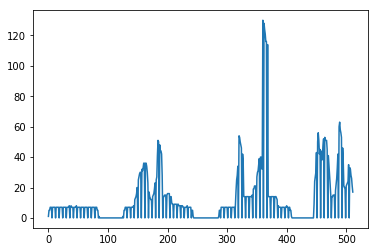

In [8]:
# 绘制x轴方向投影统计的折线图
xhist = binImgHist(img, bin_width=1, direction=1)
plt.plot(xhist)
plt.show()
# plt.savefig('digits_hist.png')

## 检索切割点

有了像素点统计之后， 我们就需要根据阈值将直方图划分为若干个片段， 从而获取到分割点。

你可以调整像素最小阈值`npixel_lowerb`的大小，获得不同的分割效果。

In [9]:
def getSplitHistPoint(img, bin_width=1, direction=1, npixel_lowerb=1):
    '''
    获取直方图的切割点，用于切割图像
       img 二值化图
       bin_width: 窗口宽度
       direction: 方向
           0: 对
       npixel_lowerb 
    '''
    # 获得统计数组
    hist = binImgHist(img, bin_width=bin_width, direction=direction)
    # 根据是否大大于最小阈值，将hist转换为布尔类型的ndarray
    bin_hist = hist > npixel_lowerb
    
    # 初始化分割点
    split_pts = [0,]
    bins = len(hist)
    for bidx in range(1,bins):
        # 检索分割点， 并添加到分割点数组
        if bin_hist[bidx] == False and bin_hist[bidx-1] == True:
            split_pts.append(bidx)
    
    if split_pts[-1] != bins-1:
        # 添加最末尾的点
        split_pts.append(bins-1)
    
    # 对分割点，进行整体放缩， 因为统计窗口bin_width可能不为1
    split_pts = list(map(lambda x: x*bin_width,split_pts))
    return split_pts
    
    

获得到分割点后， 需要根据分割点，对图像进行分割

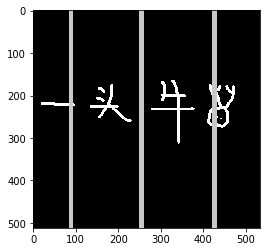

In [39]:
def doSplitImgs(img, split_pts, direction=1):
    '''
    根据分割点对原图像进行分割
    '''
    n_pts = len(split_pts)
    digits = []
    for pidx in range(1,n_pts):
        # 分割坐标起始点
        startIdx = split_pts[pidx-1]
        # 分割坐标中止点
        endIdx = split_pts[pidx]
        
        if direction == 1:
            # x轴方向
            digits.append(img[:,startIdx:endIdx])
        else:
            # y轴方向
            digits.append(img[startIdx:endIdx,:])
            
    return digits

def displaySplitResult(digits):
    '''
        展示分割后的点集
        用一个图片展示， 中间插入间隔长条（crevice_bar）
    '''
    # 初始化画布
    canvas = digits[0]
    height, width = digits[0].shape
    # 定义分隔长条
    crevice_bar = np.ones((height, 10)) * 200
    
    n_digit = len(digits)
    for didx in range(1, n_digit):
        # 不断拼接新的数字跟分隔长条
        canvas = np.hstack((canvas,crevice_bar,digits[didx]))
    
    plt.clf()
    plt.imshow(canvas, cmap='gray')
    plt.show()
    # 保存图片
    cv2.imwrite('digit_split_by_hist.png', canvas)
    
split_pts = getSplitHistPoint(img, bin_width=6, direction=1, npixel_lowerb=25)
digits = doSplitImgs(img, split_pts=split_pts, direction=1)
displaySplitResult(digits)

## 直方图分割算法总结

直方图分割法比较简单粗暴，但是也有其自身存在的问题。

1. 直方图分割算法比较简单暴力。 分割线必须竖直分割， 对于有一定倾斜角度的字符，它们的直方图就会连在一起，很难分割。
2. 同时如果线条简单而且细的笔画，也很容易被割裂， 例如上图中的凡字。
3. 如果两个字符很紧密的话， 同样也会无法识别跟分割。
4. 对于汉字，左右分布结构， 左边的偏旁也容易跟字符主体分割开来。

总之，直方图分割法，应用场景比较局限，只适用于字符内部紧凑，字间距较大的情况。